In [1]:
import pandas as pd
import os
import sys
from datetime import datetime
import re

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

Download database

In [2]:
df_2022=pd.read_csv('films_2022.csv', encoding='utf-8-sig',sep=";")
df_2022

,Titre,date_sortie,duree,genre1,genre2,genre3,réalisateur_1,réalisateur_2,actor_1,actor 2,...,nationality 1,nationality 2,distributor,nominations,budget,language,box-office,real awards,first actor awards,Second actor awards
0,#No_Filter,5 mai 2023,1h 27min,Epouvante-horreur,Thriller,NaN,Michael Dupret,NaN,Hannah McIver,Jasmine Daoud,...,Belgique,NaN,NaN,0,-,Anglais,NaN,NaN,NaN,NaN
1,10,22 décembre 2022,2h 04min,Drame,NaN,NaN,Karm Chawla,NaN,Vinay Rajkumar,Anusha Ranganath,...,Inde,NaN,NaN,0,-,-,NaN,NaN,NaN,NaN
2,13 : La comédie musicale,12 août 2022,1h 34min,Drame,Famille,Comédie musicale,Tamra Davis,NaN,Eli Golden,Josh Peck,...,U.S.A.,NaN,NaN,0,-,Anglais,NaN,1.0,NaN,0.0
3,13 Minutes,23 mars 2022,"Policier, Thriller",Policier,Thriller,NaN,NaN,NaN,Jimmy Waitman,NaN,...,U.S.A.,NaN,NaN,0,-,Anglais,NaN,NaN,0.0,0.0
4,16 ans,4 janvier 2023,1h 34min,Drame,Romance,NaN,Philippe Lioret,NaN,Sabrina Levoye,Teïlo Azaïs,...,France,NaN,Paname Distribution,1,-,Français,63 528 entrées,4.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Your Christmas or Mine?,2 décembre 2022,1h 35min,Comédie,Romance,NaN,Jim O'Hanlon,NaN,Asa Butterfield,Daniel Mays,...,Grande-Bretagne,NaN,NaN,0,-,Anglais,NaN,0.0,0.0,0.0
1241,Youssef Salem a du succès,18 janvier 2023,1h 37min,Comédie,NaN,NaN,Baya Kasmi,NaN,Ramzy Bedia,Noémie Lvovsky,...,France,NaN,Tandem,1,-,Français,157 770 entrées,2.0,1.0,4.0
1242,Yuku et la fleur de l’Himalaya,19 octobre 2022,1h 05min,Animation,Famille,Comédie musicale,Arnaud Demuynck,Rémi Durin,Lily Demuynck-Deydier,Agnès Jaoui,...,Belgique,France,Gebeka Films,0,-,Français,NaN,2.0,NaN,11.0
1243,Zalava,7 septembre 2022,1h 33min,Drame,Epouvante-horreur,NaN,Arsalan Amiri,NaN,Pouria Rahimi,Baset Rezaei,...,Iran,NaN,NaN,0,-,"Farsi, Kurde",NaN,NaN,NaN,NaN


In [3]:
df_2021=pd.read_csv('films_2021.csv', encoding='utf-8-sig',sep=";")
df_2021

,Titre,date_sortie,duree,genre1,genre2,genre3,réalisateur_1,réalisateur_2,actor_1,actor 2,...,nationality 1,nationality 2,distributor,nominations,budget,language,box-office,real awards,first actor awards,Second actor awards
0,#Home,18 août 2021,2h 38min,Drame,Famille,NaN,Rojin Thomas,NaN,Indrans,Sreenath Bhasi,...,Inde,NaN,NaN,0,-,Malais,NaN,NaN,0.0,NaN
1,'83,23 décembre 2021,2h 30min,Biopic,Drame,NaN,Kabir Khan,NaN,Deepika Padukone,Ranveer Singh,...,Inde,NaN,Night ed films,0,-,"Hindi, Tamoul",NaN,0.0,0.0,1.0
2,(Nouvelles) Confidences d'une femme mariée,19 juin 2021,"Comédie, Historique, Romance",Comédie,Historique,Romance,Lionel Baillemont,NaN,Jérémie Hamon,Lauréline Romuald,...,France,NaN,NaN,0,-,Français,NaN,0.0,NaN,NaN
3,100% bio,5 janvier 2021,1h 30min,Comédie,NaN,NaN,Fabien Onteniente,NaN,Didier Bourdon,Catherine Jacob,...,France,NaN,France 3,0,-,Français,NaN,1.0,1.0,1.0
4,107 Mothers,14 septembre 2022,1h 33min,Drame,NaN,NaN,Péter Kerekes,NaN,Maryna Klimova,Iryna Kiryazeva,...,Slovaquie,République tchèque,Les Alchimistes,1 3,-,"Russe, ukrainien",860 entrées,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,Xtreme,4 juin 2021,1h 51min,Action,Policier,Thriller,Daniel Benmayor,NaN,Teo García,Óscar Jaenada,...,Espagne,NaN,NaN,0,-,Espagnol,NaN,0.0,NaN,0.0
1361,Yakuza Princess,15 janvier 2022,1h 51min,Arts Martiaux,Thriller,NaN,Vicente Amorim,NaN,MASUMI,Jonathan Rhys-Meyers,...,Brésil,NaN,NaN,0,-,Anglais,NaN,1.0,NaN,1.0
1362,Yara,5 novembre 2021,1h 34min,Policier,Drame,Judiciaire,Marco Tullio Giordana,NaN,Isabella Ragonese,Alessio Boni,...,Italie,NaN,NaN,0,-,Italien,NaN,2.0,0.0,0.0
1363,Yes Day,12 mars 2021,1h 26min,Comédie,Famille,NaN,Miguel Arteta,NaN,Jennifer Garner,Édgar Ramírez,...,U.S.A.,NaN,NaN,0,-,Anglais,NaN,10.0,1.0,2.0


Concatenate the dataframes to have one final one

In [4]:
df = pd.concat([df_2022, df_2021],ignore_index=True, axis=0)

In [5]:
df

,Titre,date_sortie,duree,genre1,genre2,genre3,réalisateur_1,réalisateur_2,actor_1,actor 2,...,nationality 1,nationality 2,distributor,nominations,budget,language,box-office,real awards,first actor awards,Second actor awards
0,#No_Filter,5 mai 2023,1h 27min,Epouvante-horreur,Thriller,NaN,Michael Dupret,NaN,Hannah McIver,Jasmine Daoud,...,Belgique,NaN,NaN,0,-,Anglais,NaN,NaN,NaN,NaN
1,10,22 décembre 2022,2h 04min,Drame,NaN,NaN,Karm Chawla,NaN,Vinay Rajkumar,Anusha Ranganath,...,Inde,NaN,NaN,0,-,-,NaN,NaN,NaN,NaN
2,13 : La comédie musicale,12 août 2022,1h 34min,Drame,Famille,Comédie musicale,Tamra Davis,NaN,Eli Golden,Josh Peck,...,U.S.A.,NaN,NaN,0,-,Anglais,NaN,1.0,NaN,0.0
3,13 Minutes,23 mars 2022,"Policier, Thriller",Policier,Thriller,NaN,NaN,NaN,Jimmy Waitman,NaN,...,U.S.A.,NaN,NaN,0,-,Anglais,NaN,NaN,0.0,0.0
4,16 ans,4 janvier 2023,1h 34min,Drame,Romance,NaN,Philippe Lioret,NaN,Sabrina Levoye,Teïlo Azaïs,...,France,NaN,Paname Distribution,1,-,Français,63 528 entrées,4.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,Xtreme,4 juin 2021,1h 51min,Action,Policier,Thriller,Daniel Benmayor,NaN,Teo García,Óscar Jaenada,...,Espagne,NaN,NaN,0,-,Espagnol,NaN,0.0,NaN,0.0
2606,Yakuza Princess,15 janvier 2022,1h 51min,Arts Martiaux,Thriller,NaN,Vicente Amorim,NaN,MASUMI,Jonathan Rhys-Meyers,...,Brésil,NaN,NaN,0,-,Anglais,NaN,1.0,NaN,1.0
2607,Yara,5 novembre 2021,1h 34min,Policier,Drame,Judiciaire,Marco Tullio Giordana,NaN,Isabella Ragonese,Alessio Boni,...,Italie,NaN,NaN,0,-,Italien,NaN,2.0,0.0,0.0
2608,Yes Day,12 mars 2021,1h 26min,Comédie,Famille,NaN,Miguel Arteta,NaN,Jennifer Garner,Édgar Ramírez,...,U.S.A.,NaN,NaN,0,-,Anglais,NaN,10.0,1.0,2.0


In [6]:
#We can see that some columns need to be cleaned to be more easily used...

In [7]:
df["hour"]=df["duree"].astype(str).str[1]
df["minute"]=df["duree"].astype(str).str[4:6]
df["length_corrected"]=0

for i in range(0,2610,1):
    if (df.iloc[i,26] != "1" and df.iloc[i,26]!= '0' and df.iloc[i,26]!= '2' and df.iloc[i,26]!= '3'):
        df.iloc[i,26]=np.nan
        df.iloc[i,27]=np.nan

#We remove the rows where no length
df = df.dropna(axis=0, subset=['hour']).reset_index(drop=True)
df.isnull().sum()




Titre                     0
date_sortie               0
duree                     0
genre1                    0
genre2                  914
genre3                 1870
réalisateur_1            78
réalisateur_2          2296
actor_1                  53
actor 2                  74
actor 3                 135
note_presse            1653
note spectators         219
link                      0
link realisator          78
Scenar                  438
nationality 1             5
nationality 2          2046
distributor            1335
nominations               0
budget                    0
language                  0
box-office             1777
real awards             932
first actor awards      697
Second actor awards     783
hour                      0
minute                    0
length_corrected          0
dtype: int64

In [8]:
#We have now the length in minutes
df["length_corrected"]=df["hour"].astype(int)*60+df["minute"].astype(int)

In [9]:
df

,Titre,date_sortie,duree,genre1,genre2,genre3,réalisateur_1,réalisateur_2,actor_1,actor 2,...,nominations,budget,language,box-office,real awards,first actor awards,Second actor awards,hour,minute,length_corrected
0,#No_Filter,5 mai 2023,1h 27min,Epouvante-horreur,Thriller,NaN,Michael Dupret,NaN,Hannah McIver,Jasmine Daoud,...,0,-,Anglais,NaN,NaN,NaN,NaN,1,27,87
1,10,22 décembre 2022,2h 04min,Drame,NaN,NaN,Karm Chawla,NaN,Vinay Rajkumar,Anusha Ranganath,...,0,-,-,NaN,NaN,NaN,NaN,2,04,124
2,13 : La comédie musicale,12 août 2022,1h 34min,Drame,Famille,Comédie musicale,Tamra Davis,NaN,Eli Golden,Josh Peck,...,0,-,Anglais,NaN,1.0,NaN,0.0,1,34,94
3,16 ans,4 janvier 2023,1h 34min,Drame,Romance,NaN,Philippe Lioret,NaN,Sabrina Levoye,Teïlo Azaïs,...,1,-,Français,63 528 entrées,4.0,NaN,0.0,1,34,94
4,1UP,15 juillet 2022,1h 40min,Comédie,NaN,NaN,Kyle Newman,NaN,Paris Berelc,Taylor Zakhar Perez,...,0,-,Anglais,NaN,0.0,0.0,0.0,1,40,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,Xtreme,4 juin 2021,1h 51min,Action,Policier,Thriller,Daniel Benmayor,NaN,Teo García,Óscar Jaenada,...,0,-,Espagnol,NaN,0.0,NaN,0.0,1,51,111
2491,Yakuza Princess,15 janvier 2022,1h 51min,Arts Martiaux,Thriller,NaN,Vicente Amorim,NaN,MASUMI,Jonathan Rhys-Meyers,...,0,-,Anglais,NaN,1.0,NaN,1.0,1,51,111
2492,Yara,5 novembre 2021,1h 34min,Policier,Drame,Judiciaire,Marco Tullio Giordana,NaN,Isabella Ragonese,Alessio Boni,...,0,-,Italien,NaN,2.0,0.0,0.0,1,34,94
2493,Yes Day,12 mars 2021,1h 26min,Comédie,Famille,NaN,Miguel Arteta,NaN,Jennifer Garner,Édgar Ramírez,...,0,-,Anglais,NaN,10.0,1.0,2.0,1,26,86


In [10]:
#We should then change the date de sortie (release date)
df["x"]= df["date_sortie"].str.split(" ")

In [11]:
#Thanks to a quick visual analysis, I can see that the 154 row is missing values => only year which mess with the code
#We can also see that there is no day for the 5th row, the 254 th and 495. 
#As they mess with the code, we will remove them
with pd.option_context('display.max_rows', None,):
    print(df["date_sortie"])
df["date_sortie"][154]

df = df.drop(154).reset_index(drop=True)

0              5 mai 2023
1        22 décembre 2022
2            12 août 2022
3          4 janvier 2023
4         15 juillet 2022
5            octobre 2022
6           27 avril 2022
7            19 août 2022
8         25 janvier 2023
9             10 mai 2023
10        1 décembre 2022
11           22 juin 2022
12       21 décembre 2022
13        30 janvier 2023
14      23 septembre 2022
15        28 octobre 2022
16           5 avril 2023
17      14 septembre 2022
18           8 avril 2023
19         4 février 2022
20           29 juin 2022
21       16 décembre 2022
22           5 avril 2023
23        20 janvier 2022
24          29 avril 2022
25           15 juin 2022
26           11 mars 2022
27        24 octobre 2022
28      22 septembre 2022
29         1 février 2023
30           7 avril 2023
31           29 mars 2023
32          13 avril 2023
33         3 février 2023
34        9 novembre 2022
35         1 janvier 2023
36           11 mars 2022
37      26 septembre 2022
38          

In [12]:
df = df.drop(5).reset_index(drop=True)

In [13]:
df = df.drop(254).reset_index(drop=True)

In [14]:
df = df.drop(495).reset_index(drop=True)

In [15]:
with pd.option_context('display.max_rows', None,):
    print(df)


                                                  Titre        date_sortie  \
0                                            #No_Filter         5 mai 2023   
1                                                    10   22 décembre 2022   
2                              13 : La comédie musicale       12 août 2022   
3                                                16 ans     4 janvier 2023   
4                                                   1UP    15 juillet 2022   
5                              365 jours : Au lendemain      27 avril 2022   
6                           365 Jours : L'Année d'Après       19 août 2022   
7                   47 Ronin - Le Sabre de la Vengeance    25 janvier 2023   
8                                              99 Moons        10 mai 2023   
9                                   À chacun son secret    1 décembre 2022   
10                                         A Day to Die       22 juin 2022   
11             A E I O U - L'alphabet rapide de l'amour   21 déc

In [16]:
df.head()

,Titre,date_sortie,duree,genre1,genre2,genre3,réalisateur_1,réalisateur_2,actor_1,actor 2,...,budget,language,box-office,real awards,first actor awards,Second actor awards,hour,minute,length_corrected,x
0,#No_Filter,5 mai 2023,1h 27min,Epouvante-horreur,Thriller,NaN,Michael Dupret,NaN,Hannah McIver,Jasmine Daoud,...,-,Anglais,NaN,NaN,NaN,NaN,1,27,87,"[5, mai, 2023]"
1,10,22 décembre 2022,2h 04min,Drame,NaN,NaN,Karm Chawla,NaN,Vinay Rajkumar,Anusha Ranganath,...,-,-,NaN,NaN,NaN,NaN,2,04,124,"[22, décembre, 2022]"
2,13 : La comédie musicale,12 août 2022,1h 34min,Drame,Famille,Comédie musicale,Tamra Davis,NaN,Eli Golden,Josh Peck,...,-,Anglais,NaN,1.0,NaN,0.0,1,34,94,"[12, août, 2022]"
3,16 ans,4 janvier 2023,1h 34min,Drame,Romance,NaN,Philippe Lioret,NaN,Sabrina Levoye,Teïlo Azaïs,...,-,Français,63 528 entrées,4.0,NaN,0.0,1,34,94,"[4, janvier, 2023]"
4,1UP,15 juillet 2022,1h 40min,Comédie,NaN,NaN,Kyle Newman,NaN,Paris Berelc,Taylor Zakhar Perez,...,-,Anglais,NaN,0.0,0.0,0.0,1,40,100,"[15, juillet, 2022]"


In [17]:
df["day"]=0
df["month"]=0
df["year"]=0
for i in range(0,2491,1):
    df.iloc[i,30]=df.iloc[i,29][0]
    df.iloc[i,31]=df.iloc[i,29][1]
    df.iloc[i,32]=df.iloc[i,29][2]

In [18]:
df.dtypes

Titre                   object
date_sortie             object
duree                   object
genre1                  object
genre2                  object
genre3                  object
réalisateur_1           object
réalisateur_2           object
actor_1                 object
actor 2                 object
actor 3                 object
note_presse             object
note spectators         object
link                    object
link realisator         object
Scenar                  object
nationality 1           object
nationality 2           object
distributor             object
nominations             object
budget                  object
language                object
box-office              object
real awards            float64
first actor awards     float64
Second actor awards    float64
hour                    object
minute                  object
length_corrected         int32
x                       object
day                     object
month                   object
year    

In [19]:
df.isnull().sum()

Titre                     0
date_sortie               0
duree                     0
genre1                    0
genre2                  912
genre3                 1866
réalisateur_1            78
réalisateur_2          2292
actor_1                  53
actor 2                  73
actor 3                 134
note_presse            1649
note spectators         217
link                      0
link realisator          78
Scenar                  438
nationality 1             5
nationality 2          2042
distributor            1334
nominations               0
budget                    0
language                  0
box-office             1773
real awards             931
first actor awards      696
Second actor awards     782
hour                      0
minute                    0
length_corrected          0
x                         0
day                       0
month                     0
year                      0
dtype: int64

In [20]:
#We can also observe that some columns are almost exclusively composed of NaN (boxoffice/ nationality 2 etc.)
#As we do not have a huge database, we do not think that it is interesting to keep them .
df=df.drop(["box-office","nationality 2"], axis=1)

In [21]:
df.isnull().sum()

Titre                     0
date_sortie               0
duree                     0
genre1                    0
genre2                  912
genre3                 1866
réalisateur_1            78
réalisateur_2          2292
actor_1                  53
actor 2                  73
actor 3                 134
note_presse            1649
note spectators         217
link                      0
link realisator          78
Scenar                  438
nationality 1             5
distributor            1334
nominations               0
budget                    0
language                  0
real awards             931
first actor awards      696
Second actor awards     782
hour                      0
minute                    0
length_corrected          0
x                         0
day                       0
month                     0
year                      0
dtype: int64

In [22]:
#We have the same problem with genre 3 and realisateur 2
df=df.drop(["réalisateur_2", "genre3"], axis=1)

In [23]:
df.isnull().sum()

Titre                     0
date_sortie               0
duree                     0
genre1                    0
genre2                  912
réalisateur_1            78
actor_1                  53
actor 2                  73
actor 3                 134
note_presse            1649
note spectators         217
link                      0
link realisator          78
Scenar                  438
nationality 1             5
distributor            1334
nominations               0
budget                    0
language                  0
real awards             931
first actor awards      696
Second actor awards     782
hour                      0
minute                    0
length_corrected          0
x                         0
day                       0
month                     0
year                      0
dtype: int64

In [24]:
df=df.drop(["hour","minute","x","date_sortie","link","link realisator"], axis=1)

In [25]:
df

,Titre,duree,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note spectators,...,nominations,budget,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year
0,#No_Filter,1h 27min,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,"1,6",...,0,-,Anglais,NaN,NaN,NaN,87,5,mai,2023
1,10,2h 04min,Drame,NaN,Karm Chawla,Vinay Rajkumar,Anusha Ranganath,Gopal Krishna Deshpande,NaN,NaN,...,0,-,-,NaN,NaN,NaN,124,22,décembre,2022
2,13 : La comédie musicale,1h 34min,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,"2,6",...,0,-,Anglais,1.0,NaN,0.0,94,12,août,2022
3,16 ans,1h 34min,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2","3,6",...,1,-,Français,4.0,NaN,0.0,94,4,janvier,2023
4,1UP,1h 40min,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,"2,2",...,0,-,Anglais,0.0,0.0,0.0,100,15,juillet,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,Xtreme,1h 51min,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,"2,7",...,0,-,Espagnol,0.0,NaN,0.0,111,4,juin,2021
2487,Yakuza Princess,1h 51min,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,"2,1",...,0,-,Anglais,1.0,NaN,1.0,111,15,janvier,2022
2488,Yara,1h 34min,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,"3,2",...,0,-,Italien,2.0,0.0,0.0,94,5,novembre,2021
2489,Yes Day,1h 26min,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,"2,4",...,0,-,Anglais,10.0,1.0,2.0,86,12,mars,2021


In [26]:
#As we want to predict based on the spectator note, we have to have a value for it
#=> remove rows where Na
df = df.dropna(axis=0, subset=['note spectators']).reset_index(drop=True)

In [27]:
df

,Titre,duree,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note spectators,...,nominations,budget,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year
0,#No_Filter,1h 27min,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,"1,6",...,0,-,Anglais,NaN,NaN,NaN,87,5,mai,2023
1,13 : La comédie musicale,1h 34min,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,"2,6",...,0,-,Anglais,1.0,NaN,0.0,94,12,août,2022
2,16 ans,1h 34min,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2","3,6",...,1,-,Français,4.0,NaN,0.0,94,4,janvier,2023
3,1UP,1h 40min,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,"2,2",...,0,-,Anglais,0.0,0.0,0.0,100,15,juillet,2022
4,365 jours : Au lendemain,1h 46min,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,"1,2",...,2,-,"Anglais, Italien, Polonais",NaN,NaN,NaN,106,27,avril,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Xtreme,1h 51min,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,"2,7",...,0,-,Espagnol,0.0,NaN,0.0,111,4,juin,2021
2270,Yakuza Princess,1h 51min,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,"2,1",...,0,-,Anglais,1.0,NaN,1.0,111,15,janvier,2022
2271,Yara,1h 34min,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,"3,2",...,0,-,Italien,2.0,0.0,0.0,94,5,novembre,2021
2272,Yes Day,1h 26min,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,"2,4",...,0,-,Anglais,10.0,1.0,2.0,86,12,mars,2021


In [28]:
df.rename(columns = {'note spectators':'note_spectators'}, inplace = True)
df.rename(columns = {'nationality 1':'nationality_1'}, inplace = True)

In [29]:
df

,Titre,duree,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,...,nominations,budget,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year
0,#No_Filter,1h 27min,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,"1,6",...,0,-,Anglais,NaN,NaN,NaN,87,5,mai,2023
1,13 : La comédie musicale,1h 34min,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,"2,6",...,0,-,Anglais,1.0,NaN,0.0,94,12,août,2022
2,16 ans,1h 34min,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2","3,6",...,1,-,Français,4.0,NaN,0.0,94,4,janvier,2023
3,1UP,1h 40min,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,"2,2",...,0,-,Anglais,0.0,0.0,0.0,100,15,juillet,2022
4,365 jours : Au lendemain,1h 46min,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,"1,2",...,2,-,"Anglais, Italien, Polonais",NaN,NaN,NaN,106,27,avril,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Xtreme,1h 51min,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,"2,7",...,0,-,Espagnol,0.0,NaN,0.0,111,4,juin,2021
2270,Yakuza Princess,1h 51min,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,"2,1",...,0,-,Anglais,1.0,NaN,1.0,111,15,janvier,2022
2271,Yara,1h 34min,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,"3,2",...,0,-,Italien,2.0,0.0,0.0,94,5,novembre,2021
2272,Yes Day,1h 26min,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,"2,4",...,0,-,Anglais,10.0,1.0,2.0,86,12,mars,2021


In [30]:
#If we look at the budget column, we can see that it is not really interesting as only few films had a budget mentioned
df.budget.unique()

array(['-', '4,3M€', '3,5 M€', '2,24 M€', '2,4 M€', '3 M€', '3,3M€',
       '4,4 M€', '7,78M€', '2,9 M€', '2,7 M€', '5,5 M€', '3M€',
       '14,47 M€', '5,6 M€', '2 M€', '8,5M€', '3,95 M€', '3,5M€',
       '3,8 M€', '6,7 M€', '4,9M€', '2,6 M€', '3,3 M€', '2,8 M€',
       '1,84 €', '12,5 M€', '7 M€', '8 M€', '3,37M€', '6,2 M€', '6,09 M€',
       '17 M dollars', '4 M€', '$ 136 000 000', '1,4 M€', '2,62 M€',
       '16,9M€', '10 M$', '9,7 M€', '5 M€', '1 M€', '1,2 M€', '12.5 M€',
       '3,2 M€', '12 M€', '2,5 M€', '60 M€', '3,9M€', '7,94 M€', '2,7M€',
       '1,8 M€', '7,5M€', '4,3 M€', '400 000€', '4,7M€', '5,7 M€',
       '11,2M€', '4000€', '10000000', '5,9M€', '15 M $', '1200 euros',
       '1,985 M€', '2,3M€', '4,5 M€', '7.4 M€', '3,9 M€', '3,6 M€',
       '14 M€', '2,3 M€', '5,2M€', '3 500 000 euros', '€ 17,500,000',
       '3,349 M€', '2,9M€', '530 000€', '1200000 €', '6,5 M€', '4,8 M€',
       '5,2 M€'], dtype=object)

In [31]:
df=df.drop(["budget"], axis=1)

In [32]:
df=df.drop(["duree"], axis=1)

In [33]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,distributor,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,"1,6",NaN,...,NaN,0,Anglais,NaN,NaN,NaN,87,5,mai,2023
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,"2,6",Robert Horn,...,NaN,0,Anglais,1.0,NaN,0.0,94,12,août,2022
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2","3,6",Philippe Lioret,...,Paname Distribution,1,Français,4.0,NaN,0.0,94,4,janvier,2023
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,"2,2",Julia Yorks,...,NaN,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,"1,2",Tomasz Mandes,...,NaN,2,"Anglais, Italien, Polonais",NaN,NaN,NaN,106,27,avril,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,"2,7",Iván Ledesma,...,NaN,0,Espagnol,0.0,NaN,0.0,111,4,juin,2021
2270,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,"2,1",Vicente Amorim,...,NaN,0,Anglais,1.0,NaN,1.0,111,15,janvier,2022
2271,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,"3,2",Graziano Diana,...,NaN,0,Italien,2.0,0.0,0.0,94,5,novembre,2021
2272,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,"2,4",Justin Malen,...,NaN,0,Anglais,10.0,1.0,2.0,86,12,mars,2021


<AxesSubplot:>

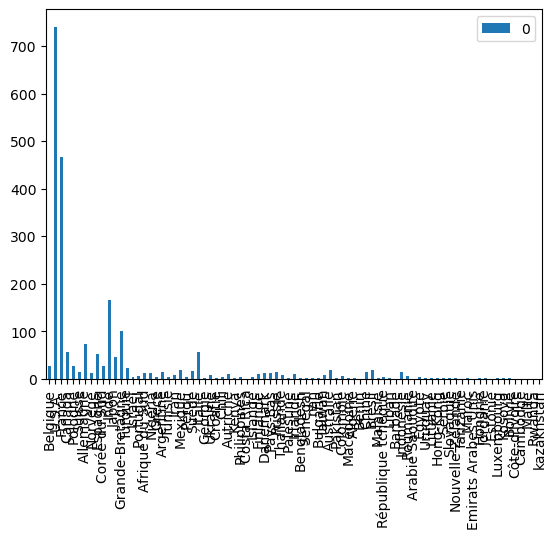

In [34]:
from collections import Counter
letter_counts = Counter(df["nationality_1"])
hist = pd.DataFrame.from_dict(letter_counts, orient='index')
hist.plot(kind='bar')

In [35]:
#Number films by country on the years 2022 and 2021
df.nationality_1.value_counts()

U.S.A.                 740
France                 466
Inde                   167
Grande-Bretagne        100
Allemagne               73
                      ... 
Barbade                  1
Emirats Arabes Unis      1
Tanzanie                 1
Bénin                    1
kazakhstan               1
Name: nationality_1, Length: 82, dtype: int64

In [36]:
#To have it in percentage
df.nationality_1.value_counts(normalize=True)

U.S.A.                 0.325848
France                 0.205196
Inde                   0.073536
Grande-Bretagne        0.044033
Allemagne              0.032144
                         ...   
Barbade                0.000440
Emirats Arabes Unis    0.000440
Tanzanie               0.000440
Bénin                  0.000440
kazakhstan             0.000440
Name: nationality_1, Length: 82, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 [Text(0, 0, 'U.S.A.'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Inde'),
  Text(3, 0, 'Grande-Bretagne'),
  Text(4, 0, 'Allemagne'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Italie'),
  Text(7, 0, 'Espagne'),
  Text(8, 0, 'Japon'),
  Text(9, 0, 'Pologne'),
  Text(10, 0, 'Belgique'),
  Text(11, 0, 'Corée du Sud'),
  Text(12, 0, 'Turquie'),
  Text(13, 0, 'Brésil'),
  Text(14, 0, 'Mexique'),
  Text(15, 0, 'Australie'),
  Text(16, 0, 'Suède'),
  Text(17, 0, 'Chine'),
  Text(18, 0, 'Russie'),
  Text(19, 0, 'Suisse'),
  Text(20, 0, 'Indonésie'),
  Text(21, 0, 'Argentine'),
  Text(22, 0, 'Danemark'),
  Text(23, 0, 'Afrique du Sud'),
  

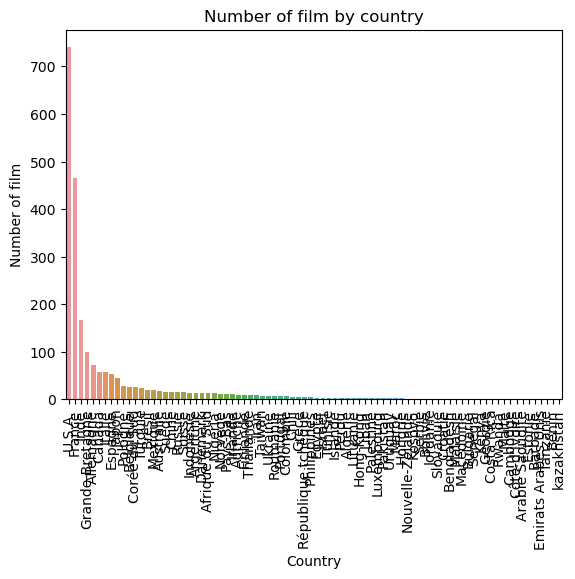

In [37]:
sn.barplot(x=df.nationality_1.value_counts().index, y=df.nationality_1.value_counts().values)
plt.title("Number of film by country")
plt.xlabel("Country")
plt.ylabel("Number of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation='vertical')

array([[<AxesSubplot:title={'center':'real awards'}>,
        <AxesSubplot:title={'center':'first actor awards'}>],
       [<AxesSubplot:title={'center':'Second actor awards'}>,
        <AxesSubplot:title={'center':'length_corrected'}>]], dtype=object)

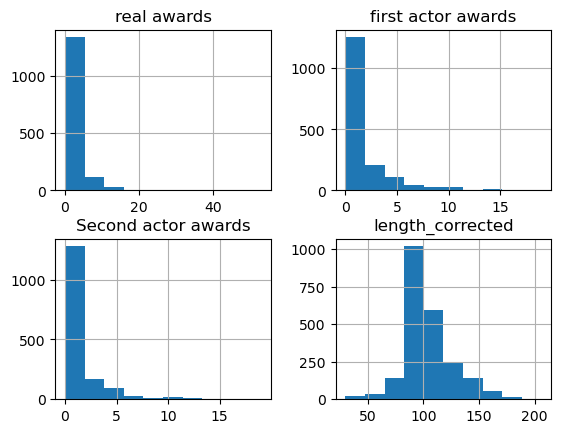

In [38]:
df.hist()

In [43]:

for i in range(0,2274,1):
    df.iloc[i,8]= df.iloc[i,8].replace(",",".")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,distributor,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,NaN,0,Anglais,NaN,NaN,NaN,87,5,mai,2023
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,NaN,0,Anglais,1.0,NaN,0.0,94,12,août,2022
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,Paname Distribution,1,Français,4.0,NaN,0.0,94,4,janvier,2023
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,NaN,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,NaN,2,"Anglais, Italien, Polonais",NaN,NaN,NaN,106,27,avril,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,NaN,0,Espagnol,0.0,NaN,0.0,111,4,juin,2021
2270,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,NaN,0,Anglais,1.0,NaN,1.0,111,15,janvier,2022
2271,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,NaN,0,Italien,2.0,0.0,0.0,94,5,novembre,2021
2272,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,NaN,0,Anglais,10.0,1.0,2.0,86,12,mars,2021


In [44]:
df["note_spectators"]=df["note_spectators"].astype(float)

def transformation_note(x):
    if x <= 1.0:
        return "catastrophic"
    elif x <=2.0 and x>1.0:
        return "bad"
    elif x <=3.0 and x>2.0:
        return "soso"
    elif x <=4.0 and x>3.0:
        return "good"
    else:
        return "excellent"
    return x

In [45]:
df["note_spectator_word"]=df["note_spectators"].apply(lambda x :transformation_note(x))

In [46]:
df.dtypes

Titre                   object
genre1                  object
genre2                  object
réalisateur_1           object
actor_1                 object
actor 2                 object
actor 3                 object
note_presse             object
note_spectators        float64
Scenar                  object
nationality_1           object
distributor             object
nominations             object
language                object
real awards            float64
first actor awards     float64
Second actor awards    float64
length_corrected         int32
day                     object
month                   object
year                    object
note_spectator_word     object
dtype: object

In [47]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0,Anglais,NaN,NaN,NaN,87,5,mai,2023,bad
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,0,Anglais,1.0,NaN,0.0,94,12,août,2022,soso
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,1,Français,4.0,NaN,0.0,94,4,janvier,2023,good
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,2,"Anglais, Italien, Polonais",NaN,NaN,NaN,106,27,avril,2022,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,0,Espagnol,0.0,NaN,0.0,111,4,juin,2021,soso
2270,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,0,Anglais,1.0,NaN,1.0,111,15,janvier,2022,soso
2271,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,0,Italien,2.0,0.0,0.0,94,5,novembre,2021,good
2272,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,0,Anglais,10.0,1.0,2.0,86,12,mars,2021,soso


In [48]:
#We will just keep the first language for ease in later computations
for i in range(0,2274,1):
    df.iloc[i,13]=df.iloc[i,13].split(",")[0]

In [49]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0,Anglais,NaN,NaN,NaN,87,5,mai,2023,bad
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,0,Anglais,1.0,NaN,0.0,94,12,août,2022,soso
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,1,Français,4.0,NaN,0.0,94,4,janvier,2023,good
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,2,Anglais,NaN,NaN,NaN,106,27,avril,2022,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,0,Espagnol,0.0,NaN,0.0,111,4,juin,2021,soso
2270,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,0,Anglais,1.0,NaN,1.0,111,15,janvier,2022,soso
2271,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,0,Italien,2.0,0.0,0.0,94,5,novembre,2021,good
2272,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,0,Anglais,10.0,1.0,2.0,86,12,mars,2021,soso


In [50]:
df.isnull().sum()

Titre                     0
genre1                    0
genre2                  807
réalisateur_1            53
actor_1                  38
actor 2                  55
actor 3                 109
note_presse            1432
note_spectators           0
Scenar                  270
nationality_1             3
distributor            1143
nominations               0
language                  0
real awards             771
first actor awards      580
Second actor awards     660
length_corrected          0
day                       0
month                     0
year                      0
note_spectator_word       0
dtype: int64

In [51]:
df = df.dropna(axis=0, subset=['actor 2']).reset_index(drop=True)

In [52]:
df.isnull().sum()

Titre                     0
genre1                    0
genre2                  790
réalisateur_1            41
actor_1                   0
actor 2                   0
actor 3                  54
note_presse            1390
note_spectators           0
Scenar                  230
nationality_1             2
distributor            1115
nominations               0
language                  0
real awards             732
first actor awards      576
Second actor awards     660
length_corrected          0
day                       0
month                     0
year                      0
note_spectator_word       0
dtype: int64

In [53]:
df = df.dropna(axis=0, subset=['réalisateur_1']).reset_index(drop=True)

In [54]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0,Anglais,NaN,NaN,NaN,87,5,mai,2023,bad
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,0,Anglais,1.0,NaN,0.0,94,12,août,2022,soso
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,1,Français,4.0,NaN,0.0,94,4,janvier,2023,good
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,2,Anglais,NaN,NaN,NaN,106,27,avril,2022,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,0,Espagnol,0.0,NaN,0.0,111,4,juin,2021,soso
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,0,Anglais,1.0,NaN,1.0,111,15,janvier,2022,soso
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,0,Italien,2.0,0.0,0.0,94,5,novembre,2021,good
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,0,Anglais,10.0,1.0,2.0,86,12,mars,2021,soso


In [55]:
df['first actor awards']=df['first actor awards'].fillna(0.0)
df['Second actor awards']=df['Second actor awards'].fillna(0.0)
df['real awards']=df['real awards'].fillna(0.0)

In [56]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0,Anglais,0.0,0.0,0.0,87,5,mai,2023,bad
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,0,Anglais,1.0,0.0,0.0,94,12,août,2022,soso
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,1,Français,4.0,0.0,0.0,94,4,janvier,2023,good
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,2,Anglais,0.0,0.0,0.0,106,27,avril,2022,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,0,Espagnol,0.0,0.0,0.0,111,4,juin,2021,soso
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,0,Anglais,1.0,0.0,1.0,111,15,janvier,2022,soso
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,0,Italien,2.0,0.0,0.0,94,5,novembre,2021,good
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,0,Anglais,10.0,1.0,2.0,86,12,mars,2021,soso


In [57]:
with pd.option_context('display.max_rows', None,):
    print(df["nominations"])

0                               0
1                               0
2                    1           
3                               0
4                   2            
5                   2            
6                               0
7                    1           
8                               0
9                               0
10                  9            
11                              0
12                              0
13      11         13            
14                              0
15                  2            
16                              0
17                              0
18                              0
19                  2            
20                              0
21                              0
22                              0
23                              0
24                              0
25       4         15            
26                              0
27                              0
28                              0
29            

In [58]:
df['nominations'].value_counts()

0                           1631
1                            168
2                             48
3                             42
4                             26
                            ... 
5         3                    1
2         13                   1
5         4                    1
6         15                   1
6         10                   1
Name: nominations, Length: 78, dtype: int64

In [59]:
df.head()

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,nominations,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0,Anglais,0.0,0.0,0.0,87,5,mai,2023,bad
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,0,Anglais,1.0,0.0,0.0,94,12,août,2022,soso
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,1,Français,4.0,0.0,0.0,94,4,janvier,2023,good
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,2,Anglais,0.0,0.0,0.0,106,27,avril,2022,bad


In [60]:
df["nomi"]=0
for i in range(0,2178,1):
    df.iloc[i,12]=" ".join(df.iloc[i,12].split())
    if len(df.iloc[i,12])==1:
        df.iloc[i,22] = df.iloc[i,12]
    elif len(df.iloc[i,12])==2:
             df.iloc[i,22] = df.iloc[i,12]
    elif len(df.iloc[i,12])==3:
             df.iloc[i,22]=int(df.iloc[i,12][:1])+int(df.iloc[i,12][-1:])
    elif len(df.iloc[i,12])==4:
             df.iloc[i,22]=int(df.iloc[i,12][:1])+int(df.iloc[i,12][-2:])
    elif len(df.iloc[i,12])==5:
             df.iloc[i,22]=int(df.iloc[i,12][:2])+int(df.iloc[i,12][-2:])
    #df.iloc[i,22]= df.iloc[i,12][-2:]

In [61]:
with pd.option_context('display.max_rows', None,):
    print(df["nomi"])

0        0
1        0
2        1
3        0
4        2
5        2
6        0
7        1
8        0
9        0
10       9
11       0
12       0
13      24
14       0
15       2
16       0
17       0
18       0
19       2
20       0
21       0
22       0
23       0
24       0
25      19
26       0
27       0
28       0
29       0
30       0
31       3
32       1
33       0
34       9
35       0
36       0
37       0
38       0
39       1
40       7
41       0
42       0
43       0
44       0
45       0
46       0
47       7
48       0
49       8
50       0
51       4
52       4
53       0
54       4
55       0
56       4
57       4
58       0
59       0
60       0
61       8
62       0
63       9
64       0
65       0
66       0
67      11
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       5
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       8

In [62]:
df["nomi"][13]

24

In [63]:
int(df.iloc[13,12][:2])+int(df.iloc[13,12][-2:])

24

In [64]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word,nomi
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,bad,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,soso,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,good,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,bad,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,Espagnol,0.0,0.0,0.0,111,4,juin,2021,soso,0
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,Anglais,1.0,0.0,1.0,111,15,janvier,2022,soso,0
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,Italien,2.0,0.0,0.0,94,5,novembre,2021,good,0
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,Anglais,10.0,1.0,2.0,86,12,mars,2021,soso,0


In [65]:
df=df.drop(["nominations"], axis=1)

In [66]:
df.to_csv('films2021_2022_clean.csv', encoding='utf-8-sig',sep=";", index=False)